Telegram-канал: https://t.me/+r7KAOw2PCAphYzVi

# Метрические методы классификации и регрессии

На прошлой лекции мы обсуждали, какие задачи ставятся перед исследователями в парадигме Supervised Learning. Сегодня мы поговорим о том, как решать две наиболее популярные задачи - задачи классификации и регрессии - при помощи класса методов, которые называются метрическими.
_______________________________
**Напоминание:** Задачи обучения с учителем (то есть тех, в которых нам даны метки в обучающем датасете, а наша задача - научиться их предсказывать) делятся на несколько веток, одна из самых важных - задача классификации. В этом случае наша задача - предсказать класс некоторого объекта, то есть метка представляет собой один из  $M$  классов. Если  $M = 2$, то задача называется задачей бинарной классификации.

Вторая крупная ветка - это задача регрессии. В этом случае меткой служит число, принципиально не ограниченное каким-то конечным множеством. Это может быть произвольное значение, взятое из определенного интервала.

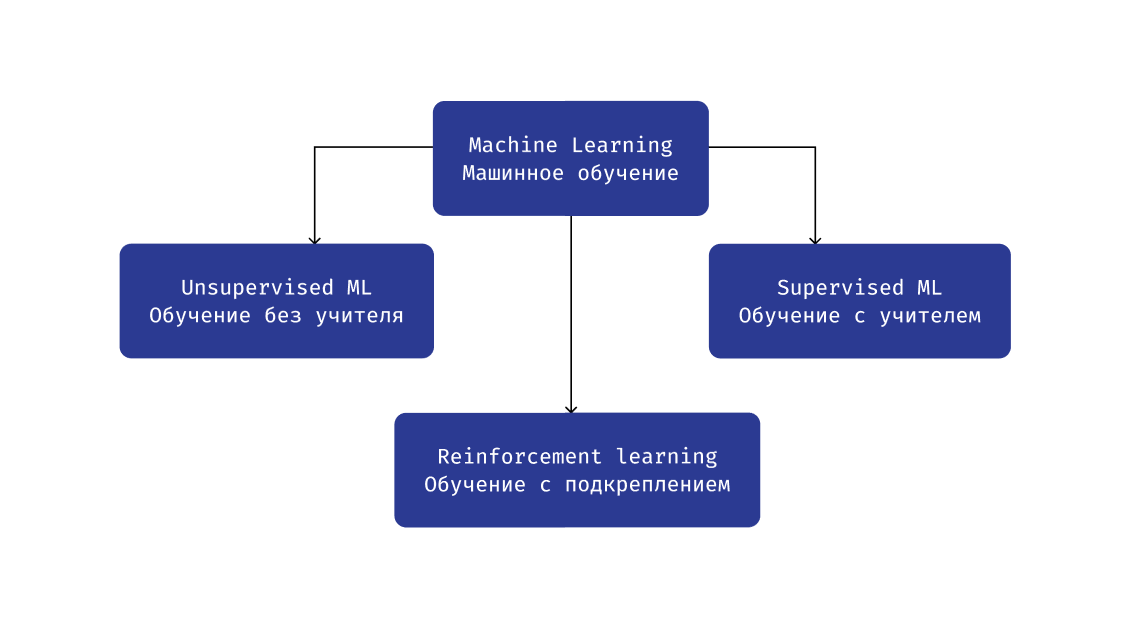

Рассмотрим для начала следующую задачу.

Хорошо известно, что жители столицы Англии, города Лондона, очень любят футбол, а также провести часок-другой в ресторане, обсуждая успехи любимой команды. Лондонцы болеют за команды целыми кварталами и даже районами. Даже владельцы ресторанов часто проявляют любовь и симпатию к той или иной команде в оформлении заведения, чем и привлекают туда болельщиков соответствующего клуба. Рассмотрим городские районы, среди которых выделим рестораны болельщиков клуба Chelsea и рестораны болельшиков клуба Arsenal.

Турист нашел эти рестораны в местных путеводителях, но на Tripadviser нет никаких сведений по поводу клубов. Турист - ярый болельщик Arsenal и хотел бы попасть в близкий по духу ресторан. Какой из двух возможных ресторанов (желтый и зеленый на карте) он должен посетить?

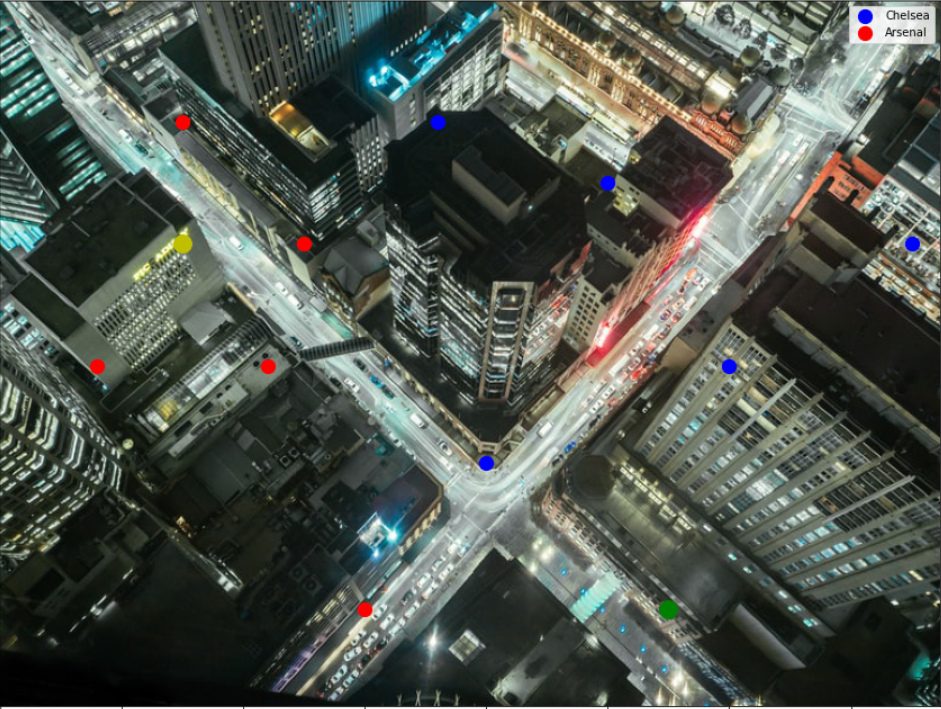

Разброс ресторанов по району представлен на изображении выше.

А теперь давайте попробуем определить, к какому клубу относится заведение, отмеченное на карте желтым цветом?
А зеленым?

**Как вы сделали свой выбор?**

![](https://drive.google.com/uc?export=view&id=1wgLX08x3zVlh_uhqjlXkvQqh69mXimV8)

Ответ кроется в том, что вы оценивали статус ресторана по известным статусам наиболее близких к нему ресторанов! Воспользуемся этой идеей для разработки методов классификации.



# Обобщенный метрический классификатор

Пусть мы имеем информацию о $N$ объектах ${x_1} ... {x_N}$. Наша задача состоит в классификации объекта $X$ (для простоты будем рассматривать *бинарную* классификацию, как в случае с болельщиками Chelsea и Arsenal).



Пусть также мы можем определить $\textbf{близость}$ объекта $X$ к каждому из объектов $x_i$, то есть мы знаем функцию близости $\rho(x,y)$, обладающую следующими свойствами:
$$1. \rho(x,x) = 0, \rho(x,y) > 0$$
$$2. \rho(x,y) = \rho(y,x)$$
$$3. \rho(x,z) \leq \rho(x,y) + \rho(y,z)$$

Эти свойства абсолютно естественные и понятные: первое свойство говорит о том, что функция, которую мы хотим назвать расстоянием должна быть больше или равна нулю (при этом расстояние между двумя объектами равно нулю, только если эти объекты совпадают). Второе свойство говорит, что расстояние от первого объекта до второго равно расстоянию от второго до первого, а третье - это знаменитое неравенство треугольника, каждый из нас встречался с ним в школе.

Тогда упорядочим нашу выборку ${x_1} ... {x_N}$ по возрастанию значения функции $\rho$ (то есть близкие к $X$ объекты поставим первыми, а дальние - последними).

Пусть также каждый объект $x_i$ обладает своей собственной $\textbf{важностью}$ (например, насколько данный ресторан близок к классифицируемому, насколько долго идти или же - насколько много фанатов регулярно посещают этот ресторан), которую мы обозначим за $w_i(X)$.  $w_i(X)$ чаще всего будет зависеть от расстояния между $X$ и $x_i$.

Тогда алгоритм $\textbf{обобщенного метрического классификатора}$ строится следующим образом:
для каждого из двух классов 0 и 1 выберем те объекты из обучающей выборки, которые принадлежат соответствующему классу и просуммируем их важности.

Пусть $X^0$ - это множество объектов нулевого класса, а $X^1$ - множество объектов первого класса. Тогда $R_0$ - это суммарная важность объектов нулевого класса, а $R_1$ - первого.

$$R_0 = \sum\limits_{i |x_i \in X^0} w_i(X)$$
$$R_1 = \sum\limits_{i |x_i \in X^1} w_i(X)$$

И просто сравним их!
Если $R_0 > R_1$, значит общая важность (или близость) объектов класса 0 к классифицируемому оказалась больше, чем объекта класса 1. Значит, объект отнесем к классу 0. А иначе - наоборот.

# Метод k-ближайших соседей

Частный случай метрического классификатора - это метод k-ближайших соседей. Его идея очень проста: все объекты обучающей выборки признаются либо одинаково важными для нас, либо неважными совершенно (то есть, обладающими нулевой важностью), в зависимости от того, входит ли этот объект в список k-ближайших.


# Выбор метрики

Выбор метрики $\rho(x,y)$ в пространстве объектов $X$ - это довольно серьёзная проблема. Метрика показывает нам, насколько похожи объекты, выбирать её можно по-разному. Метрику также можно настраивать по обучающей выборке.

В следующих определениях введены такие обозначения:

$x$ и $y$ здесь - это точки много мерного пространства $X$, в котором мы работаем. Каждая из этих точек представлена свои векторным описанием: $x = (x_1 ... x_n)$ и $y = (y_1 ... y_n)$.


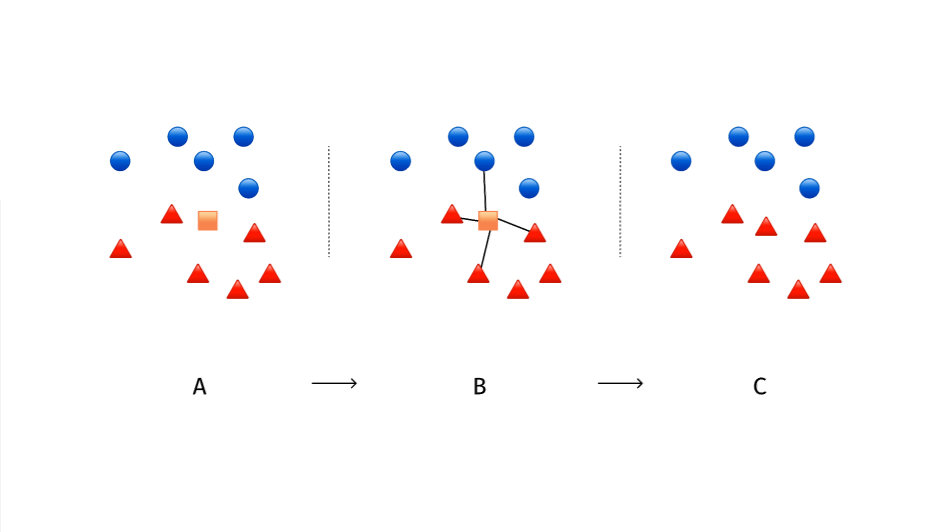


## 1. Евклидова метрика
Самая знакомая “школьная” мера сходства объектов

$$\rho(x,y) = (\sum\limits_{i=1}^n(x_i - y_i)^2)^{\frac{1}{2}}$$

Это всем знакомая теорема Пифагора: если есть точка $x$ и точка $y$, то расстояние между ними можно посчитать, как корень из суммы квадратов катетов соответствующего прямоугольного треугольника.

### Достоинства:
- Простота
- Интуитивность
- Частая применимость

### Недостатки:
- Сильно зависит от нормы векторов $x$ и $y$
- Чем выше размерность векторов, тем менее полезна Евклидова метрика





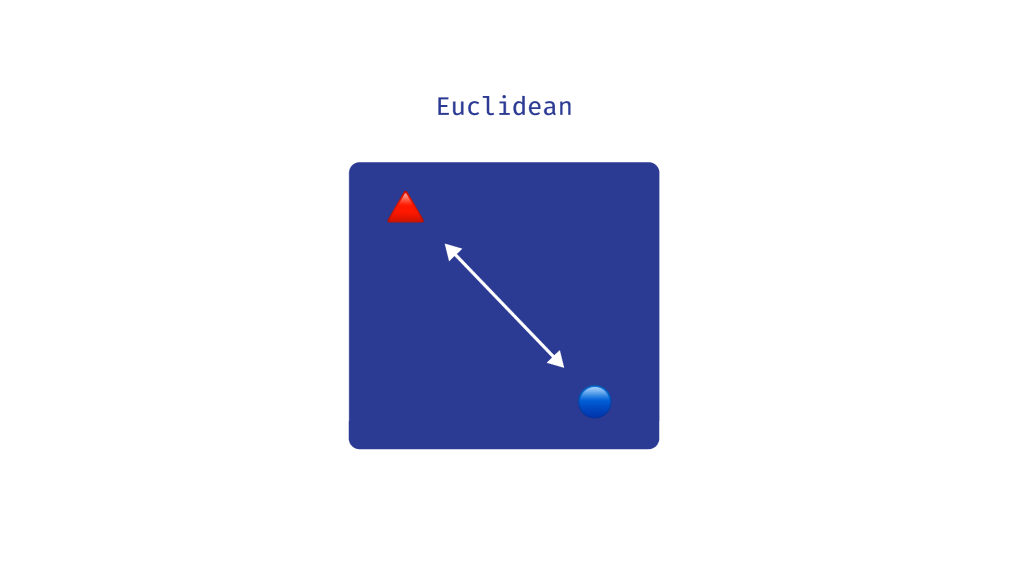


## 2. Косинусная схожесть

$$\rho^*(x,y) = \frac{(x,y)}{|x||y|} = \frac{\sum\limits_{i=1}^n{x_i}{y_i}}{|x||y|}$$

То есть в качестве метрики мы рассматриваем косинус угла между векторами.
Когда косинусная схожесть равна 0, между векторами нет ничего общего, они перпендекулярны.

### Достоинства:
- Хорошо подходит для работы с данными высокой размерности
- Определяется именно углом между векторами, поэтому не зависит от их нормы

### Недостатки:
- Теперь же мы не учитываем отличия норм векторов совсем. Для некоторых задач это может быть существенно

Примечание:

Для расстояния есть требование, что оно неотрицательно. Должно выполняться требование, что чем ближе вектора друг к другу, тем расстояние меньше. В данном случае, эти требования, очевидно, не выполнены


Часто используется величина, называемая косинусным расстоянием.
Косинусное расстояние вычисляется, как $\rho(x,y) = 1 - \frac{(x,y)}{|x||y|}$
И соотношение здесь противоположное:
когда косинусное расстояние равно 1, между векторами нет ничего общего. Это больше интуитивно похоже на расстояние в классическом смысле, именно поэтому часто используют его.

Обратите внимание: косинусное расстояние не удовлетворяет неравенству треугольника.


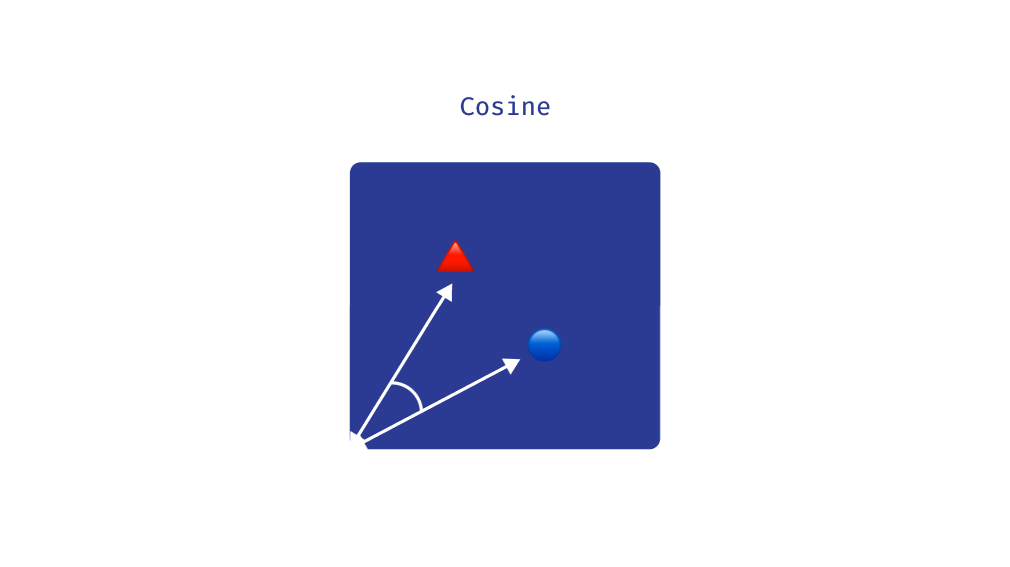

## 3. Расстояние городских кварталов (Манхэттенское)

$$\rho(x,y) = \sum\limits_{i=1}^n|x_i - y_i|$$

Эта метрика также довольно интуитивна:
Если Вы идете по городу, выстроенному ровными прямоугольными кварталами, Вы не сможете сократить свой путь наискосок, воспользовавшись теоремой Пифагора. Вам придется в любом случае пройти все расстояние вдоль обеих осей.

### Достоинства:
- Хорошо подходит для работы с дискретными (в частности бинарными) данными

### Недостатки:
- Подходит для довольно узкого круга задач




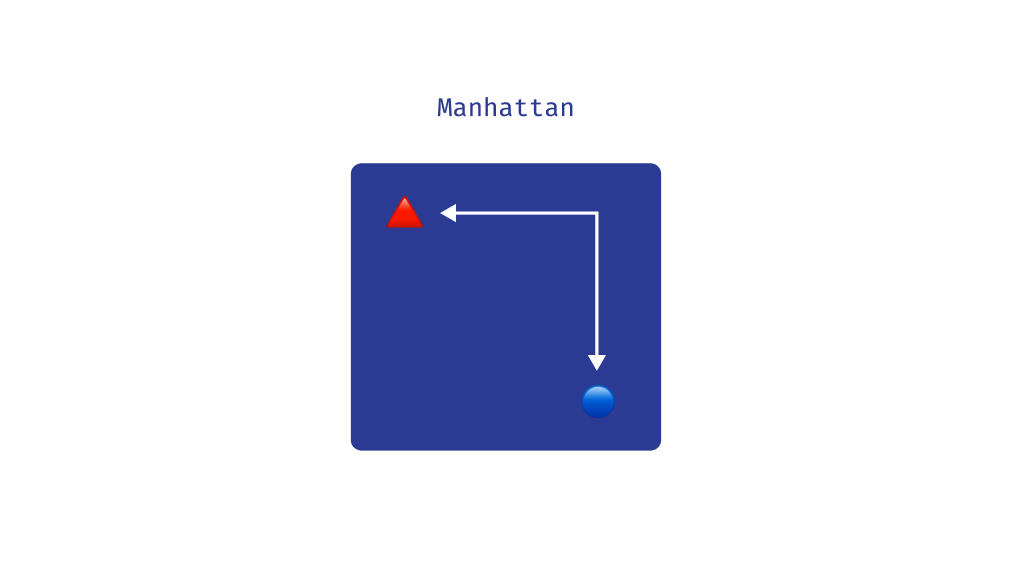

## 4. Формула Хаверсина

$$\rho(x,y) = 2arcsin\big{[}(sin^2(\frac{x_1 - y_1}{2}) + cos(x_1)cos(y_1)sin^2(\frac{x_2 - y_2}{2}))^{\frac{1}{2}}\big{]}$$

Формула связана со специфической задачей описания расстояния на сфере.

### Достоинства:
- Описывает расстояние на сфере

### Недостатки:
- Идеальные сферы в мире встречаются нечасто (даже земля далеко не идеальная сфера)

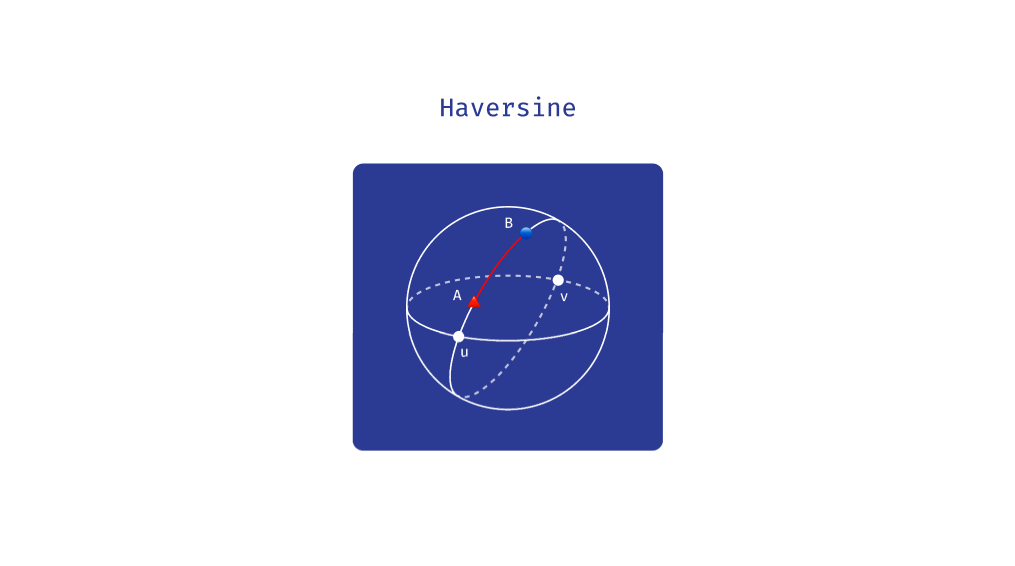

О практическом применениии формулы Хаверсина можно узнать в материалах [семинара](https://colab.research.google.com/drive/1lou5UahIJaA6zbD2pfgGt_bmfFIaG8jU?usp=sharing).

Более подробно про метрики можно узнать из материалов [лекций курса "Математика для анализа данных"](https://teach-in.ru/lecture/2021-11-18-Matematiki2-1).

Приведём несколько функций для подсчета различных расстояний из `numpy`:

In [35]:
"""
В numpy есть модуль, предназначенный для работы с различными структурами линейной алгебры. Этот модуль называется numpy.linalg
В частности, в этом модуле можно найти функцию для подсчета нормы некоторого вектора, проще говоря - его длины с точки зрения некоторой метрики
Эта функция называется numpy.linalg.norm
https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
"""

import numpy as np
from numpy.linalg import norm

In [36]:
"""
В базовом случае np.linalg.norm вычисляет наиболее знакомую и понятную для нас 2-норму, которая отвечает евклидовой метрике
"""
vec = np.array([1,2,3])

In [37]:
np.linalg.norm(vec)

np.float64(3.7416573867739413)

In [38]:
#а теперь посчитаем длину этого вектора сами
np.sqrt(vec[0]**2 + vec[1]**2 + vec[2]**2)

np.float64(3.7416573867739413)

На основе функции `linalg.norm` очень просто написать функцию для подсчета расстояния между двумя точками в многомерном пространстве

In [39]:
def dist(a: np.ndarray, b: np.ndarray) -> float:
    """
    Расчет расстояния между двумя векторами.

    Args:
    a (np.ndarray): Первый вектор
    b (np.ndarray): Второй вектор

    Returns:
    float: Расстояние между векторами
    """
    # Вычитание векторов
    d = a - b

    # Вычисление нормы разницы
    r = np.linalg.norm(d)

    return r


In [40]:
dist(np.array([1, 0]), np.array([0, 1]))

np.float64(1.4142135623730951)

что, конечно, равно $\sqrt{2}$

In [41]:
np.sqrt(2)

np.float64(1.4142135623730951)

Не сложнее посчитать и расстояние городских кварталов.
Существует общая формула для вычисления целого семейства стандартных расстояний между элементами многомерного векторного пространства. Эта формула выглядит так:

$$\rho_p(\vec{x},\vec{y}) = (∑\limits_{i=1}^n|x_i - y_i|^p)^{\frac{1}{p}}$$

несложно заметить, что при $:p$=2 мы получаем формулу евклидового расстояния, а при $p$=1 - расстояния городских кварталов.

Этот параметр p можно в целом выбирать практически произвольно (не будем сейчас останавливаться на ограничениях для $p$).
Оказывается, в `np.linalg.norm` также можно выбрать параметр $p$. Этот параметр определяется значением аргумента `ord`. То есть, для того чтобы посчитать расстояние городских кварталов, достаточно присвоить значение 1 соответствующему аргументу

In [42]:
import numpy as np

def dist(a: np.ndarray, b: np.ndarray, p: int) -> float:
    """
    Расчет расстояния между двумя векторами с использованием метрики Lp.

    Args:
    a (np.ndarray): Первый вектор
    b (np.ndarray): Второй вектор
    p (int): Параметр метрики Lp (обычно 1, 2 или ∞)

    Returns:
    float: Расстояние между векторами по метрике Lp
    """
    # Вычитание векторов
    d = a - b

    # Вычисление нормы разницы с использованием метрики Lp
    r = np.linalg.norm(d, ord=p)

    return r

In [43]:
dist(np.array([1, 0]), np.array([0, 1]), 1)

np.float64(2.0)

То же можно осуществить и для косинусного расстояния

In [44]:
def cosine(a: np.ndarray, b: np.ndarray) -> float:
    """
    Вычисление косинуса угла между двумя векторами.

    Args:
    a (np.ndarray): Первый вектор
    b (np.ndarray): Второй вектор

    Returns:
    float: Косинус угла между векторами
    """
    # Скалярное произведение векторов
    dot = np.dot(a, b)

    # Нормы векторов
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)

    # Вычисление косинуса
    cos = dot / norm_a / norm_b

    return cos

def cosine_dist(a: np.ndarray, b: np.ndarray) -> float:
    """
    Вычисление косинусового расстояния между двумя векторами.

    Args:
    a (np.ndarray): Первый вектор
    b (np.ndarray): Второй вектор

    Returns:
    float: Косинусовое расстояние между векторами
    """
    # Вычисление косинуса угла
    cos = cosine(a, b)

    # Формула косинусового расстояния
    dist = 1 - cos

    return dist

In [45]:
cosine(np.array([1,0]), np.array([0,1]))

np.float64(0.0)

In [46]:
cosine_dist(np.array([1,0]), np.array([0,1]))

np.float64(1.0)

Это логично, ведь векторы перпендекулярны.

Но то же можно сделать намного проще, воспользовавшись функцией из модуля `scipy`.

In [47]:
from scipy.spatial.distance import cosine as c

In [48]:
c(np.array([1,0]), np.array([0,1]))

np.float64(1.0)

Важный недостаток KNN состоит в его неоднозначности: одинаковая сумма голосов может достигаться на нескольких классах одновременно. Конечно, если классов всего два, можно взять нечетное число $k$, и проблема будет решена, но если классов будет больше, нас это не спасет. Есть более общий вариант решения этой проблемы: введем последовательность весов $w_i$, каждый из которых будет задавать **вклад** $i$-го соседа в классификацию. В этом случае $w_i$ показывает то, насколько $i$-й объект удален от классифицируемого. Выбор последовательность весов $w_i$ ложится на наши плечи и представляет собой эвристику.


____________________________________________________________________________________________________________________
## Дополнение (опциональное) *

Почему бы не сделать так, чтобы более близким объектам соответствовали более высокие веса, а дальним – маленькие? То есть сделать так, чтобы $w_i$ зависел не от номера $i$ непосредственно, а от расстояния между $x$ и $x_i$

Такой метод называется методом окон Парзена

$$ a_h(x) =  \arg \max_{y \in Y} \sum\limits_{i=1}^l [y^{(i)} = y]K\big{(}\frac{\rho(x, x_i)}{h}\big{)}  $$

**Пояснение**:
смысл этой формулы состоит вновь в том, что мы рассматриваем все классы из множества классов $Y$ (на этот раз их может быть больше, чем 2). Для каждого класса считаем сумму *важностей* тех объектов, которые принадлежат к этому классу, относительно классифицируемого объекта $x$ и выбираем тот класс, для которого соответствующее значение получилось наибольшим.

Обратите внимание, что в записи данной формулы присутствует некая функция $K$. Что это такое? Это функция, которая называется **ядром**, и обладает следующими свойствами: она не возрастает с ростом аргумента (если тот больше нуля). Она четная (симметрична относительно нуля), непрерывна и ограничена. То есть ядро в данном контексте понимается как функция **важности** ее аргумента.

Обратите внимание, что ядро здесь зависит от аргумента, пропорционального расстоянию до объекта и обратно пропорционального ширине окна $h$. Обычно ядра выбирают так, чтобы оно было нулевым за пределами отрезка от -1 до 1. Как это понимать? Для всех $x$, что лежат к классифицируемому объекту **ближе, чем размер окна $h$,** мы задаем вес обратно пропорциональный расстоянию для этого объекта, а для $x$, лежащих **за пределами окна размера $h$**, задаем нулевой вес.

____________________________________________________________________________________________________________________

# А что делать с задачей регрессии?

## Рассмотрим ее на таком примере:

Вам дали карту гор, но высоты указаны лишь для некоторых точек на этой карте. Вас же просят определить, какова вероятная высота рельефа в некоторых других точках?


![](https://drive.google.com/uc?export=view&id=1JyFbK0epT6EAZ2OSF34ZZdwBxfxeikq0)

Для того чтобы определить высоту в синей точке логично будет:

а)  рассматривать не все имеющиеся данные, а лишь те точки, которые расположены в некоторой окрестности искомой точки;

б) усреднить значения высот в близких точках с учетом их близости.


![](https://drive.google.com/uc?export=view&id=19gUdmqRScLDD5rtGVgxnQ_deFZVb9SF2)

## KNN для регрессии

Воспользуемся этой идеей, чтобы получить обобщение метода на задачу регрессии.

Рассмотрим следующие три идеи:

- Идея 1: Если нам даны $n$ точек из обучающей выборки, и известно значение скрытой функции в этих точках, то во всех остальных наше предсказание может быть усреднением значений во всех известных точках
- Идея 2: Мы можем попытаться найти константу получше, чем просто среднее значение. Пусть это будет константа $\alpha$ в окрестности $x \in X$. Как определить эту константу?

Мы хотим, чтобы эта константа была как можно сильнее похожа на все известные нам в окрестности значения функции в некотором "общем смысле". Посмотрим, насколько эта константа отличается от каждого из известных значений, и усредним ошибку. Однако, мы не можем просто так взять и усреднить значение ошибки в явном виде. Рассмотрим пример:

Пусть ошибка в точке А составила 100, а в точке B — -100. Тогда средняя ошибка будет 0, несмотря на то, что наша константа очень сильно ошибается в каждой конкретной точке. Поэтому усреднять мы будем не значение ошибки, а значение **квадрата ошибки**.

Так как определить эту константу? Решив задачу минимизации среднего квадрата отклонения известных значений $y_i$ от этой константы. Именно такой функционал представляет собой усредненную ошибку нашего предсказания по всему датасету: $$Q_X(\alpha) = \frac{1}{N} \sum\limits_{i=1}^N (y_i - \alpha)^2$$
Или мы можем учесть важность каждого из объектов $w_i$: $$Q_X(\alpha) = \frac{1}{N} \sum\limits_{i=1}^N w_i(y_i - \alpha)^2$$

Математика позволяет нам найти такое значение $α$, что средний квадрат ошибки принимает наименьшее из всех возможных значений.



## Опционально*
_____________________________________________
- Идея 3: Попробуем делать предсказания, усредняя все известные значения из обучающей выборки с учетом их важности для данного объекта. То есть если точка $x_i$ находится далеко от $X$, то для предсказания в точке $X$ вклад $y_i$ будет маленьким, а если близко - большим. Тогда мы можем записать следующую формулу: $$A(X) = \frac{\sum\limits_{i=1}^N w_i y_i}{\sum\limits_{i=1}^N w_i} = \frac{\sum\limits_{i=1}^N K(\frac{\rho(X, x_i)}{h}) y_i}{\sum\limits_{i=1}^N K(\frac{\rho(X, x_i)}{h})}$$

Функция $K$ здесь как раз таки говорит нам, насколько важен конкретный объект из обучающей выборки для предсказания в анализируемой точке.

 ___________________________________________________________________________________________________________________
# Преимущества и недостатки метрических алгоритмов


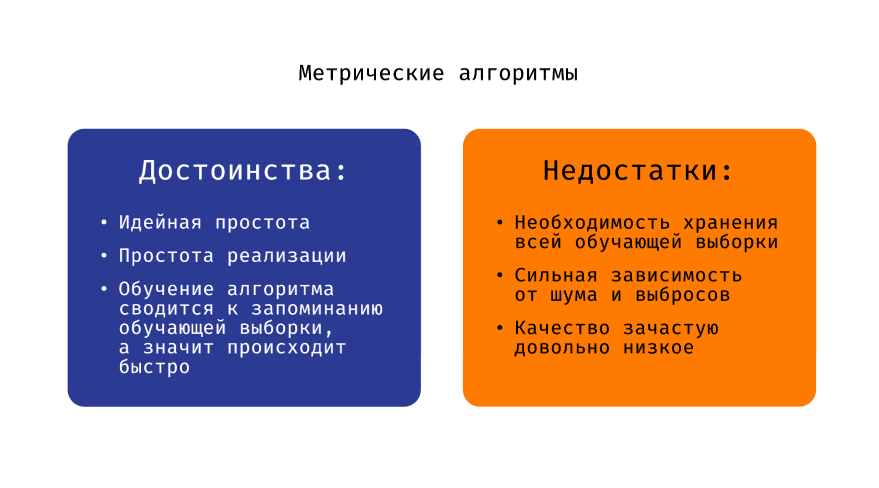

# Попробуем реализовать алгоритм KNN своими руками!

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

## Реализация на Python

Напишем функцию KNN, которая вернет нам предсказание, согласно алгоритму k ближайших соседей и набор k ближайших точек, по которым было сделано предсказание
### Предположения:
#### - Работаем на двумерной плоскости
#### - Решаем задачу бинарной классификации
#### - k подбираем руками

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def draw(KNN):
    """
    Декоратор, позволяющий отрисовывать результат, полученный в результате работы функции KNN
    """

    def wrapper(point: list, class1: np.ndarray, class2: np.ndarray, N: int, normfunc):
        print(KNN.__name__, "running")
        plt.figure(figsize=(15, 15))

        """
        задаем размеры классов
        """
        num_1 = class1.shape[0]
        num_2 = class2.shape[0]
        num = num_1 + num_2

        """
        Задаем координаты точек из каждого класса X и Y
        """
        X1 = class1[:, 0]
        Y1 = class1[:, 1]
        X2 = class2[:, 0]
        Y2 = class2[:, 1]
        X = np.concatenate([X1, X2])
        Y = np.concatenate([Y1, Y2])
        class_flag = [0 for i in range(num_1)] + [1 for i in range(num_2)]

        """
        Записываем все в dataframe, чтобы воспользоваться методами seaborn
        """
        data = pd.DataFrame({"Class": class_flag, "X": X, "Y": Y})
        plt.grid()
        plt.scatter(x=point[0], y=point[1], c="r")
        sns.scatterplot(data=data, x="X", y="Y", hue="Class")

        """
        Пользуемся функцией, которую пишем самостоятельно, чтобы получить выход алгоритма
        """
        result, sorted_points = KNN(point, class1, class2, N, normfunc)
        print(f"RESULT: point was assigned to class {result}")

        for i in range(N):
            plt.plot(
                [sorted_points[i][0], point[0]],
                [sorted_points[i][1], point[1]],
                c="r" if sorted_points[i][2] == 0 else "b",
            )

    return wrapper


In [74]:
import numpy as np

@draw
def KNN(point: list, class1: np.ndarray, class2: np.ndarray, K: int, normfunc: callable):
    """
    Классификация точки с помощью алгоритма KNN
    """

    """
    задаем размеры классов
    """
    num_1 = class1.shape[0]
    num_2 = class2.shape[0]
    num = num_1 + num_2

    """
    Задаем координаты точек из каждого класса X и Y
    """
    X1 = class1[:, 0]
    Y1 = class1[:, 1]
    X2 = class2[:, 0]
    Y2 = class2[:, 1]

    # print("X1", X1)
    # print("Y1",Y1)

    # Преобразуем массивы в формат (n, 1) для корректной работы с numpy
    X = np.concatenate([X1.reshape(-1, 1), X2.reshape(-1, 1)])
    Y = np.concatenate([Y1.reshape(-1, 1), Y2.reshape(-1, 1)])

    # print("X",X)
    # print("Y",Y)
    """
    Проводим сортировку всех точек, добавив к ним значение класса, к которому они принадлежат,
    На основе заданной функции расстояния normfunc = normfunc(x1, y1, x2, y2)
    """
    class_flag = np.array(
        [0 for i in range(num_1)] + [1 for i in range(num_2)]
    ).reshape(-1, 1)
    # print("flag: ", class_flag)
    keyfunc = lambda P: normfunc(P[0], P[1], point[0], point[1])
    points = np.concatenate((X, Y, class_flag), axis=1).tolist()

    sorted_points = sorted(points, key=keyfunc)
    # print(sorted_points)

    """
    Считаем в цикле число точек, попавших в класс 0 и попавших в класс 1, из top-K
    """
    C0 = 0
    C1 = 0
    for p in sorted_points[:K]:
        assert p[2] == 1 or p[2] == 0
        if p[2] == 0:
            C0 += 1
        else:
            C1 += 1
    result = 0 if C0 > C1 else 1
    print(f"There are {C0} points of class 0 in the set of {K} nearest points")
    print(f"There are {C1} points of class 1 in the set of {K} nearest points")
    return result, sorted_points[:K]


## Примеры использования

KNN running
[[-1.5489621423259008, 4.761874348307753, 0.0], [0.5457742774629004, 5.07667936601832, 0.0], [-0.4801464371223254, 5.288457857369414, 0.0], [-0.6961022664774945, 5.34871086384039, 0.0], [1.2454191194340722, 5.34388514895987, 0.0], [0.17947045068412734, 5.574565287349945, 0.0], [-1.1716186405574613, 5.46047831487, 0.0], [0.04579897185403881, 5.747282969100329, 0.0], [0.008444130555279823, 5.78067516414359, 0.0], [-0.6537458793164735, 5.818788077576002, 0.0], [-1.255902257139101, 5.709258123275008, 0.0], [0.4184615356742557, 6.112338874559773, 0.0], [-2.5971540949417724, 5.50012112816921, 0.0], [0.15868791152896283, 6.201358341045374, 0.0], [0.3754927978380812, 6.223376937844677, 0.0], [0.3295630984452635, 6.258611847286235, 0.0], [0.04920908800455093, 6.285955166614508, 0.0], [0.6412774618443821, 6.30420558532083, 0.0], [0.6845328977432612, 6.353660997437385, 0.0], [0.21354498221151647, 6.4717730496147485, 0.0], [-0.4135185212676026, 6.463975385570283, 0.0], [-1.028441561705

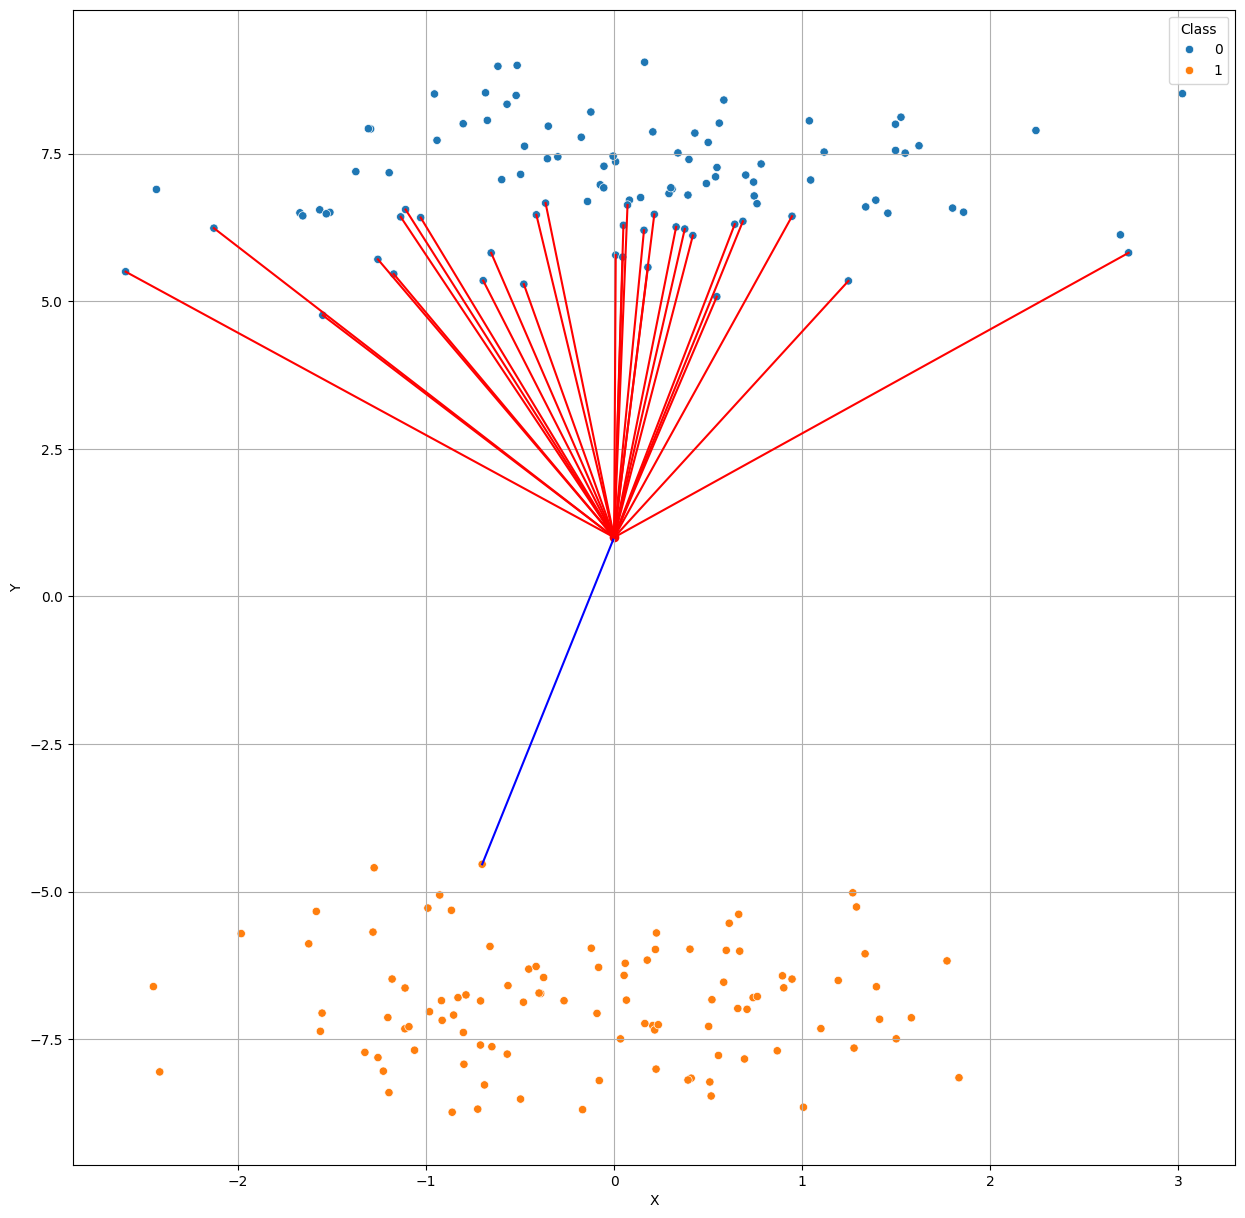

In [75]:
import numpy as np
import random

def euc_distance(point_1_x, point_1_y, point_2_x, point_2_y):
    """
    Вычисление евклидового расстояния между двумя точками.

    Args:
    point_1_x (float): X-координата первой точки
    point_1_y (float): Y-координата первой точки
    point_2_x (float): X-координата второй точки
    point_2_y (float): Y-координата второй точки

    Returns:
    float: Евклидовая дистанция между двумя точками
    """
    x_diff = point_1_x - point_2_x
    y_diff = point_1_y - point_2_y
    return np.sqrt(x_diff**2 + y_diff**2)

def generate_class_data(mean1, mean2, std_dev, n_samples):
    """
    Генерация случайных данных для двух классов.

    Args:
    mean1 (list): Среднее значение для первого класса
    mean2 (list): Среднее значение для второго класса
    std_dev (float): Стандартное отклонение
    n_samples (int): Количество образцов для каждого класса

    Returns:
    tuple:
        class1 (numpy.ndarray): Данные для первого класса
        class2 (numpy.ndarray): Данные для второго класса
    """
    class1 = np.random.randn(n_samples, 2) + np.array(mean1)
    class2 = np.random.randn(n_samples, 2) + np.array(mean2)
    return class1, class2

# Генерация данных для классов
point = [0, 1]
mean1 = [0.0, 7.0]
mean2 = [0.0, -7.0]
std_dev = 1.0
n_samples = 100

class_1, class_2 = generate_class_data(mean1, mean2, std_dev, n_samples)

K = 30
KNN(point, class_1, class_2, K, euc_distance)

KNN running
[-3.         -2.94949495 -2.8989899  -2.84848485 -2.7979798  -2.74747475
 -2.6969697  -2.64646465 -2.5959596  -2.54545455 -2.49494949 -2.44444444
 -2.39393939 -2.34343434 -2.29292929 -2.24242424 -2.19191919 -2.14141414
 -2.09090909 -2.04040404 -1.98989899 -1.93939394 -1.88888889 -1.83838384
 -1.78787879 -1.73737374 -1.68686869 -1.63636364 -1.58585859 -1.53535354
 -1.48484848 -1.43434343 -1.38383838 -1.33333333 -1.28282828 -1.23232323
 -1.18181818 -1.13131313 -1.08080808 -1.03030303 -0.97979798 -0.92929293
 -0.87878788 -0.82828283 -0.77777778 -0.72727273 -0.67676768 -0.62626263
 -0.57575758 -0.52525253 -0.47474747 -0.42424242 -0.37373737 -0.32323232
 -0.27272727 -0.22222222 -0.17171717 -0.12121212 -0.07070707 -0.02020202
  0.03030303  0.08080808  0.13131313  0.18181818  0.23232323  0.28282828
  0.33333333  0.38383838  0.43434343  0.48484848  0.53535354  0.58585859
  0.63636364  0.68686869  0.73737374  0.78787879  0.83838384  0.88888889
  0.93939394  0.98989899  1.04040404  1

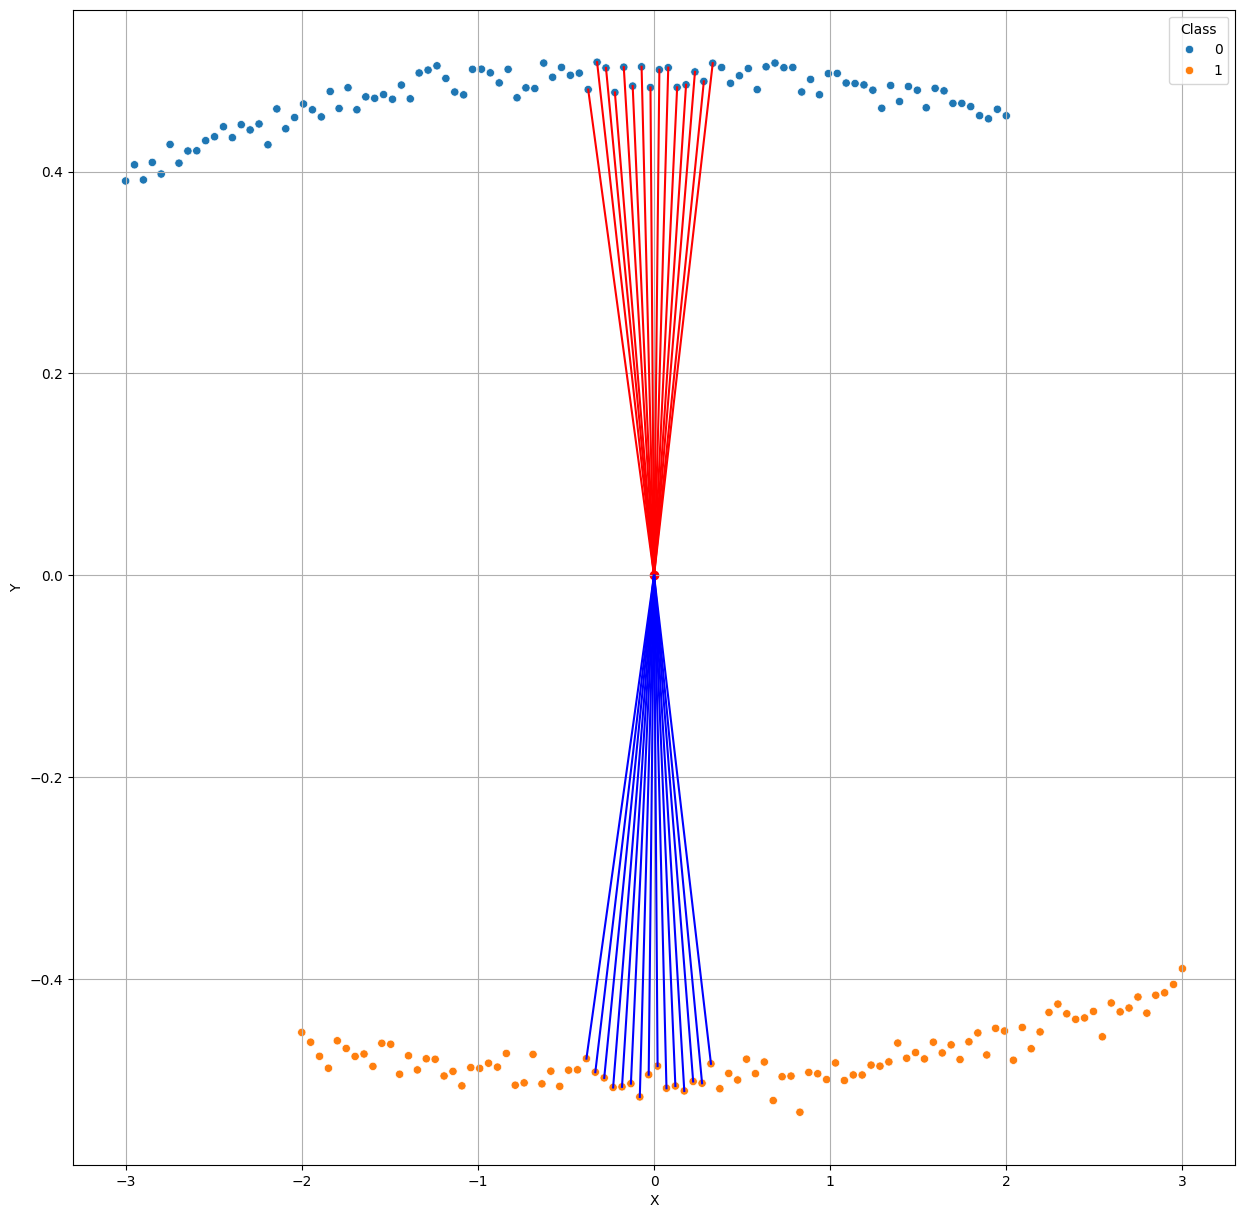

In [53]:
import numpy as np

# Инициализация точки
point = [0, 0]

# Создание массивов классов
class_1 = []
class_2 = []

for x in np.linspace(-3, 2, 100):
    class_1.append([x, np.sqrt(25 - x**2) / 10 + np.random.randn() / 100])

for x in np.linspace(-2, 3, 100):
    class_2.append([x, -np.sqrt(25 - x**2) / 10 + np.random.randn() / 100])

class_1 = np.array(class_1)
class_2 = np.array(class_2)

K = 30

KNN(point, class_1, class_2, K, euc_distance)

KNN running
[-3.         -2.94949495 -2.8989899  -2.84848485 -2.7979798  -2.74747475
 -2.6969697  -2.64646465 -2.5959596  -2.54545455 -2.49494949 -2.44444444
 -2.39393939 -2.34343434 -2.29292929 -2.24242424 -2.19191919 -2.14141414
 -2.09090909 -2.04040404 -1.98989899 -1.93939394 -1.88888889 -1.83838384
 -1.78787879 -1.73737374 -1.68686869 -1.63636364 -1.58585859 -1.53535354
 -1.48484848 -1.43434343 -1.38383838 -1.33333333 -1.28282828 -1.23232323
 -1.18181818 -1.13131313 -1.08080808 -1.03030303 -0.97979798 -0.92929293
 -0.87878788 -0.82828283 -0.77777778 -0.72727273 -0.67676768 -0.62626263
 -0.57575758 -0.52525253 -0.47474747 -0.42424242 -0.37373737 -0.32323232
 -0.27272727 -0.22222222 -0.17171717 -0.12121212 -0.07070707 -0.02020202
  0.03030303  0.08080808  0.13131313  0.18181818  0.23232323  0.28282828
  0.33333333  0.38383838  0.43434343  0.48484848  0.53535354  0.58585859
  0.63636364  0.68686869  0.73737374  0.78787879  0.83838384  0.88888889
  0.93939394  0.98989899  1.04040404  1

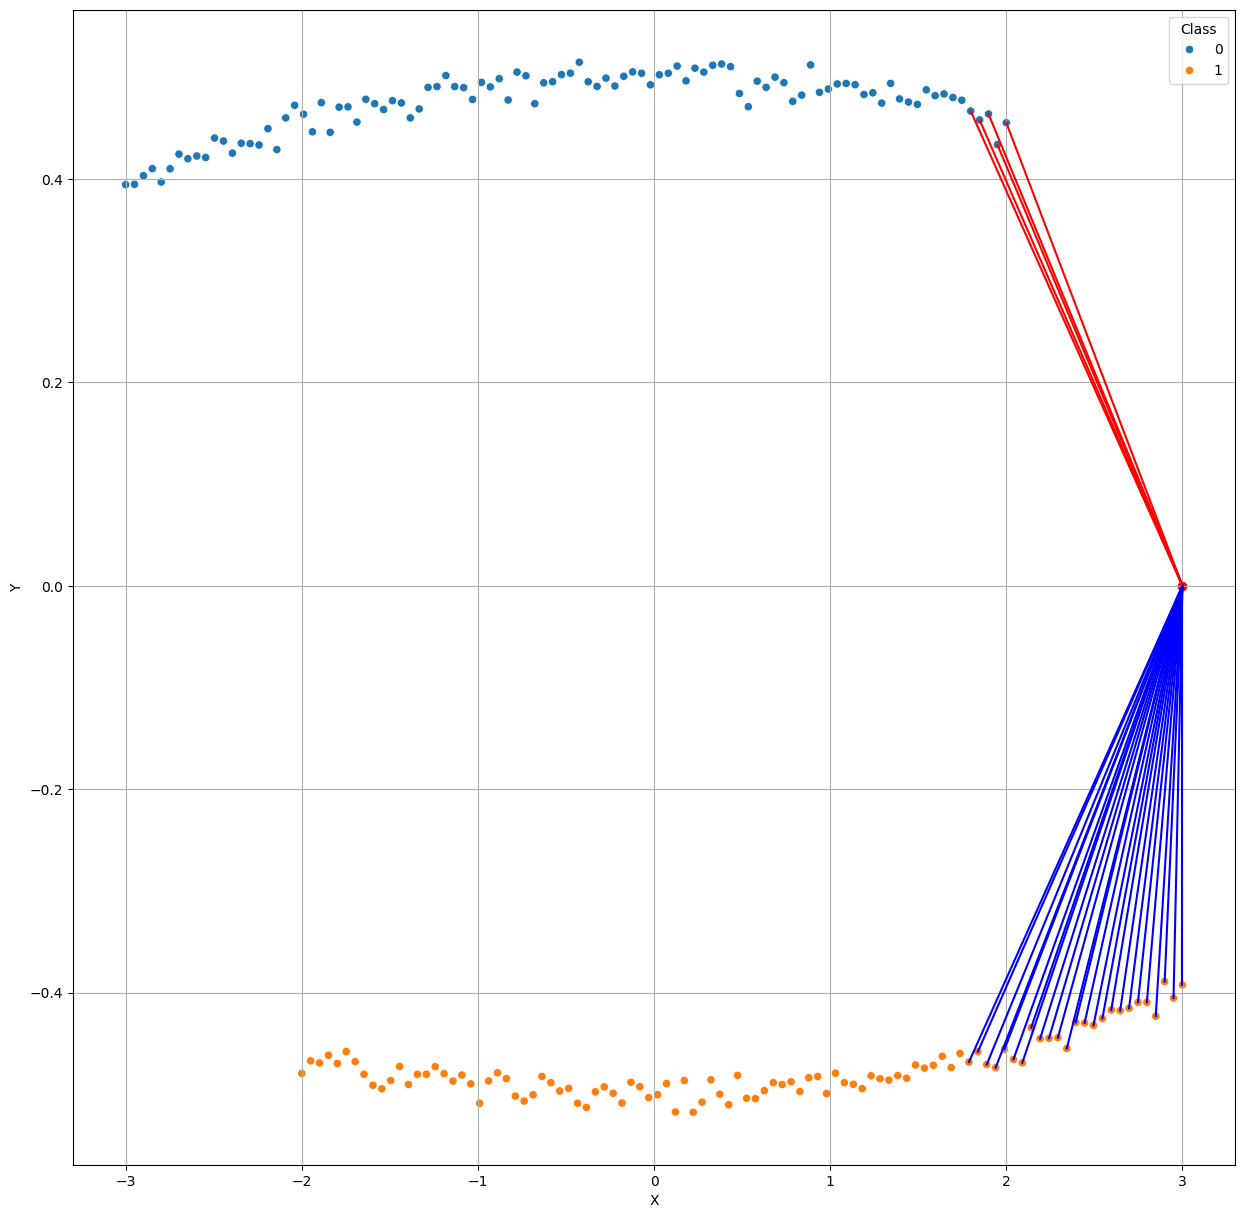

In [54]:
import numpy as np

# Инициализация точки
point = [3, 0]

# Создание массивов классов
class_1 = []
class_2 = []

for x in np.linspace(-3, 2, 100):
    class_1.append([x, np.sqrt(25 - x**2) / 10 + np.random.randn() / 100])

for x in np.linspace(-2, 3, 100):
    class_2.append([x, -np.sqrt(25 - x**2) / 10 + np.random.randn() / 100])

class_1 = np.array(class_1)
class_2 = np.array(class_2)

K = 30

KNN(point, class_1, class_2, K, euc_distance)

## Неправильный выбор K

Часто бывает так, что выбранный K плохо подходит для решения данной задачи. Причем увеличение K не всегда приводит к улучшению работы алгоритма

KNN running
[-3.         -2.94949495 -2.8989899  -2.84848485 -2.7979798  -2.74747475
 -2.6969697  -2.64646465 -2.5959596  -2.54545455 -2.49494949 -2.44444444
 -2.39393939 -2.34343434 -2.29292929 -2.24242424 -2.19191919 -2.14141414
 -2.09090909 -2.04040404 -1.98989899 -1.93939394 -1.88888889 -1.83838384
 -1.78787879 -1.73737374 -1.68686869 -1.63636364 -1.58585859 -1.53535354
 -1.48484848 -1.43434343 -1.38383838 -1.33333333 -1.28282828 -1.23232323
 -1.18181818 -1.13131313 -1.08080808 -1.03030303 -0.97979798 -0.92929293
 -0.87878788 -0.82828283 -0.77777778 -0.72727273 -0.67676768 -0.62626263
 -0.57575758 -0.52525253 -0.47474747 -0.42424242 -0.37373737 -0.32323232
 -0.27272727 -0.22222222 -0.17171717 -0.12121212 -0.07070707 -0.02020202
  0.03030303  0.08080808  0.13131313  0.18181818  0.23232323  0.28282828
  0.33333333  0.38383838  0.43434343  0.48484848  0.53535354  0.58585859
  0.63636364  0.68686869  0.73737374  0.78787879  0.83838384  0.88888889
  0.93939394  0.98989899  1.04040404  1

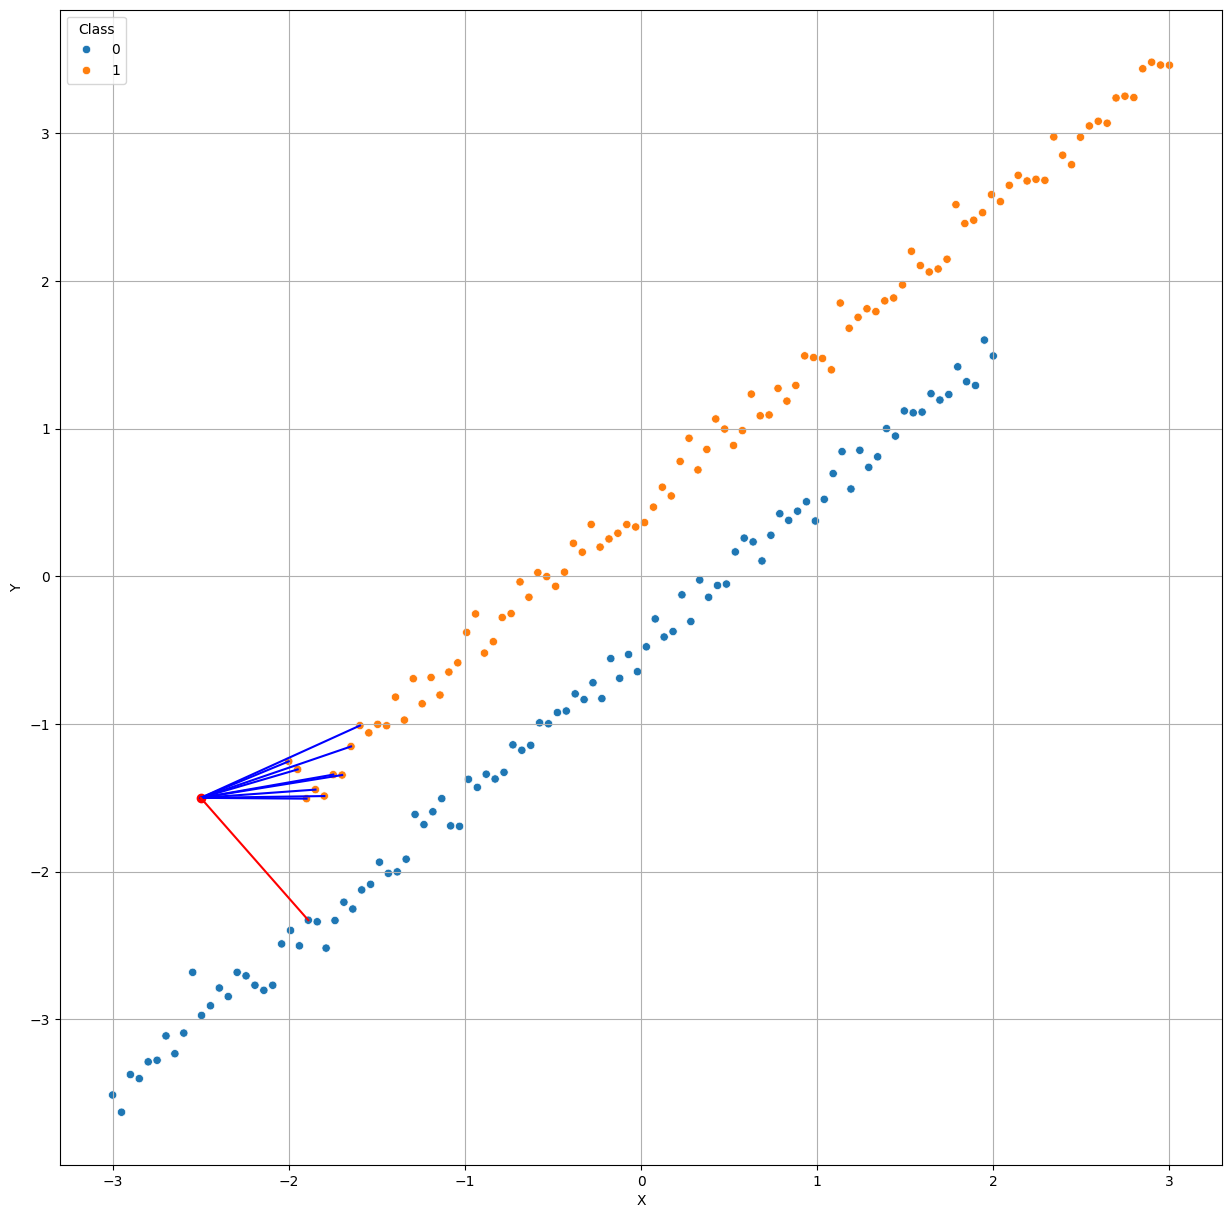

In [55]:
import numpy as np

point = [-2.5, -1.5]
class_1 = []
class_2 = []

for x in np.linspace(-3, 2, 100):
    class_1.append([x, x - 0.5 + np.random.randn() / 10])

for x in np.linspace(-2, 3, 100):
    class_2.append([x, x + 0.5 + np.random.randn() / 10])

class_1 = np.array(class_1)
class_2 = np.array(class_2)
K = 10
KNN(point, class_1, class_2, K, euc_distance)

**Казалось бы - чем больший k мы выберем, тем надежнее наш алгоритм отработает. НО:**

В этом случае мы видим, что это не так

KNN running
[-3.         -2.94949495 -2.8989899  -2.84848485 -2.7979798  -2.74747475
 -2.6969697  -2.64646465 -2.5959596  -2.54545455 -2.49494949 -2.44444444
 -2.39393939 -2.34343434 -2.29292929 -2.24242424 -2.19191919 -2.14141414
 -2.09090909 -2.04040404 -1.98989899 -1.93939394 -1.88888889 -1.83838384
 -1.78787879 -1.73737374 -1.68686869 -1.63636364 -1.58585859 -1.53535354
 -1.48484848 -1.43434343 -1.38383838 -1.33333333 -1.28282828 -1.23232323
 -1.18181818 -1.13131313 -1.08080808 -1.03030303 -0.97979798 -0.92929293
 -0.87878788 -0.82828283 -0.77777778 -0.72727273 -0.67676768 -0.62626263
 -0.57575758 -0.52525253 -0.47474747 -0.42424242 -0.37373737 -0.32323232
 -0.27272727 -0.22222222 -0.17171717 -0.12121212 -0.07070707 -0.02020202
  0.03030303  0.08080808  0.13131313  0.18181818  0.23232323  0.28282828
  0.33333333  0.38383838  0.43434343  0.48484848  0.53535354  0.58585859
  0.63636364  0.68686869  0.73737374  0.78787879  0.83838384  0.88888889
  0.93939394  0.98989899  1.04040404  1

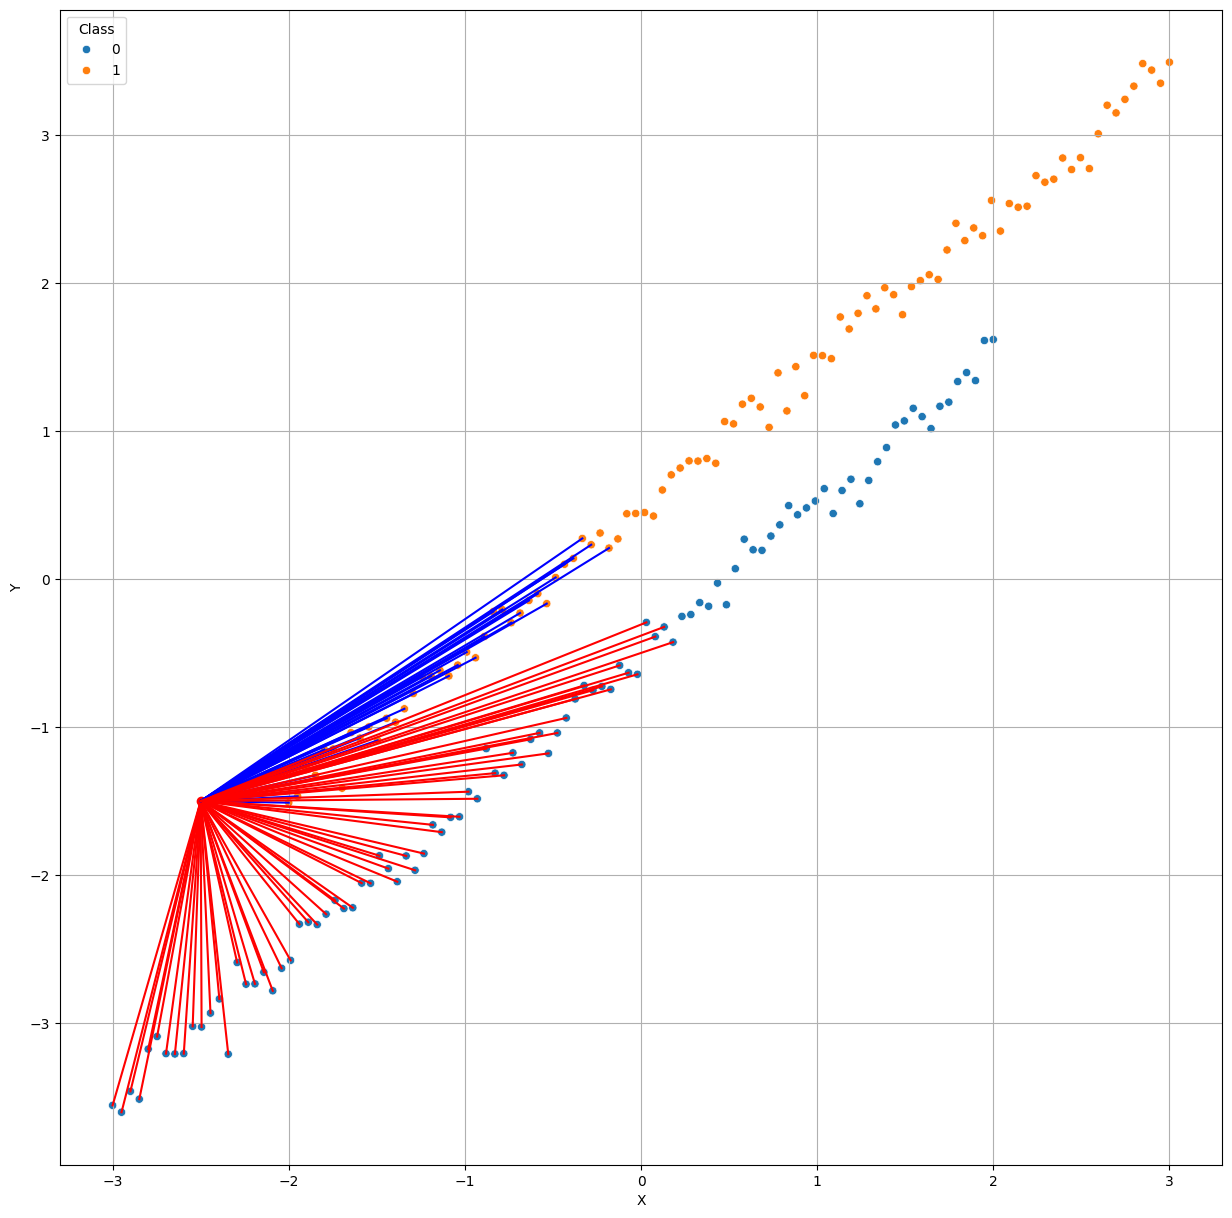

In [56]:
import numpy as np

point = [-2.5, -1.5]
class_1 = []
class_2 = []

for x in np.linspace(-3, 2, 100):
    class_1.append([x, x - 0.5 + np.random.randn() / 10])

for x in np.linspace(-2, 3, 100):
    class_2.append([x, x + 0.5 + np.random.randn() / 10])

class_1 = np.array(class_1)
class_2 = np.array(class_2)
K = 100
KNN(point, class_1, class_2, K, euc_distance)

## Адаптация метрик

Обратим внимание, что классические метрики конкретно в данном случае очень плохо отражают особенности поставленной задачи.

В данном случае наши выборки имеют ленточную структуру. Кажется вполне логичным рассматривать метрику, учитывающую этот факт.

Например, можно рассмотреть такую функцию:

$$f(x_1,y_1, x_2, y_2) = |\hat{b_1} - \hat{b_2}| = |(x_1 - y_1) - (x_2 - y_2)|$$

$\hat{b}$ здесь - это что-то вроде коэффициента смещения прямой, на которой лежит пара точек ($x$, $y$) при условии, что мы считаем угловой коэффициент такой прямой единичным

KNN running
[-3.         -2.94949495 -2.8989899  -2.84848485 -2.7979798  -2.74747475
 -2.6969697  -2.64646465 -2.5959596  -2.54545455 -2.49494949 -2.44444444
 -2.39393939 -2.34343434 -2.29292929 -2.24242424 -2.19191919 -2.14141414
 -2.09090909 -2.04040404 -1.98989899 -1.93939394 -1.88888889 -1.83838384
 -1.78787879 -1.73737374 -1.68686869 -1.63636364 -1.58585859 -1.53535354
 -1.48484848 -1.43434343 -1.38383838 -1.33333333 -1.28282828 -1.23232323
 -1.18181818 -1.13131313 -1.08080808 -1.03030303 -0.97979798 -0.92929293
 -0.87878788 -0.82828283 -0.77777778 -0.72727273 -0.67676768 -0.62626263
 -0.57575758 -0.52525253 -0.47474747 -0.42424242 -0.37373737 -0.32323232
 -0.27272727 -0.22222222 -0.17171717 -0.12121212 -0.07070707 -0.02020202
  0.03030303  0.08080808  0.13131313  0.18181818  0.23232323  0.28282828
  0.33333333  0.38383838  0.43434343  0.48484848  0.53535354  0.58585859
  0.63636364  0.68686869  0.73737374  0.78787879  0.83838384  0.88888889
  0.93939394  0.98989899  1.04040404  1

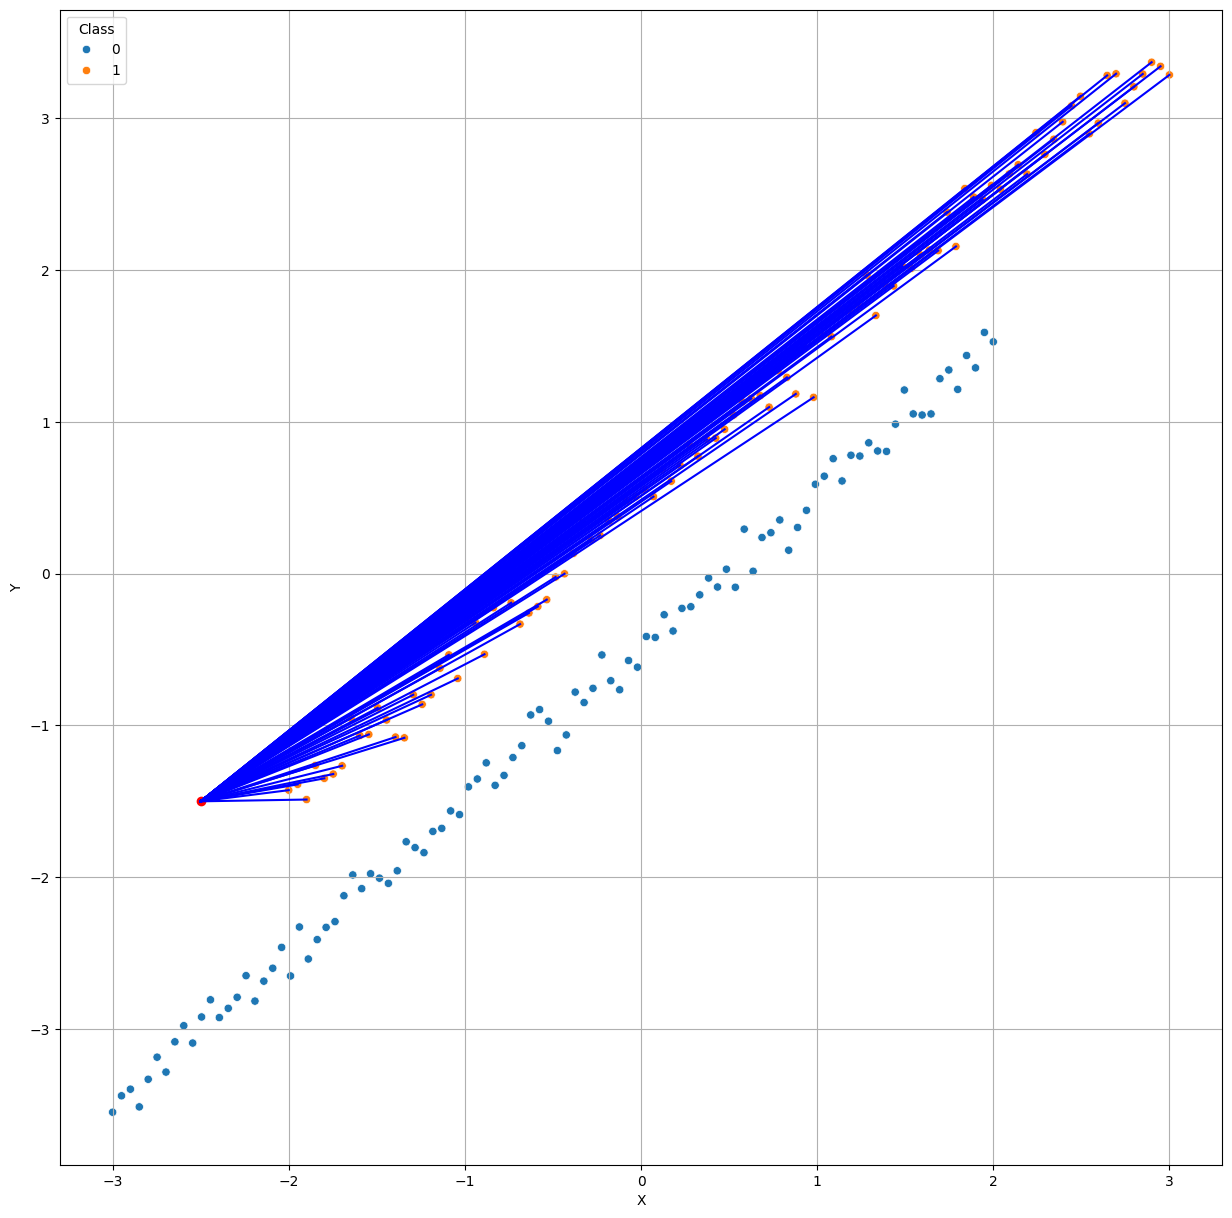

In [57]:
import numpy as np

def sub_distance(point_1_x, point_1_y, point_2_x, point_2_y):
    return abs((point_1_x - point_1_y) - (point_2_x - point_2_y))

point = [-2.5, -1.5]
class_1 = []
class_2 = []

for x in np.linspace(-3, 2, 100):
    class_1.append([x, x - 0.5 + np.random.randn() / 10])

for x in np.linspace(-2, 3, 100):
    class_2.append([x, x + 0.5 + np.random.randn() / 10])

class_1 = np.array(class_1)
class_2 = np.array(class_2)
K = 100
KNN(point, class_1, class_2, K, sub_distance)

Эта метрика подходит нам довольно хорошо

KNN running
[-3.         -2.94949495 -2.8989899  -2.84848485 -2.7979798  -2.74747475
 -2.6969697  -2.64646465 -2.5959596  -2.54545455 -2.49494949 -2.44444444
 -2.39393939 -2.34343434 -2.29292929 -2.24242424 -2.19191919 -2.14141414
 -2.09090909 -2.04040404 -1.98989899 -1.93939394 -1.88888889 -1.83838384
 -1.78787879 -1.73737374 -1.68686869 -1.63636364 -1.58585859 -1.53535354
 -1.48484848 -1.43434343 -1.38383838 -1.33333333 -1.28282828 -1.23232323
 -1.18181818 -1.13131313 -1.08080808 -1.03030303 -0.97979798 -0.92929293
 -0.87878788 -0.82828283 -0.77777778 -0.72727273 -0.67676768 -0.62626263
 -0.57575758 -0.52525253 -0.47474747 -0.42424242 -0.37373737 -0.32323232
 -0.27272727 -0.22222222 -0.17171717 -0.12121212 -0.07070707 -0.02020202
  0.03030303  0.08080808  0.13131313  0.18181818  0.23232323  0.28282828
  0.33333333  0.38383838  0.43434343  0.48484848  0.53535354  0.58585859
  0.63636364  0.68686869  0.73737374  0.78787879  0.83838384  0.88888889
  0.93939394  0.98989899  1.04040404  1

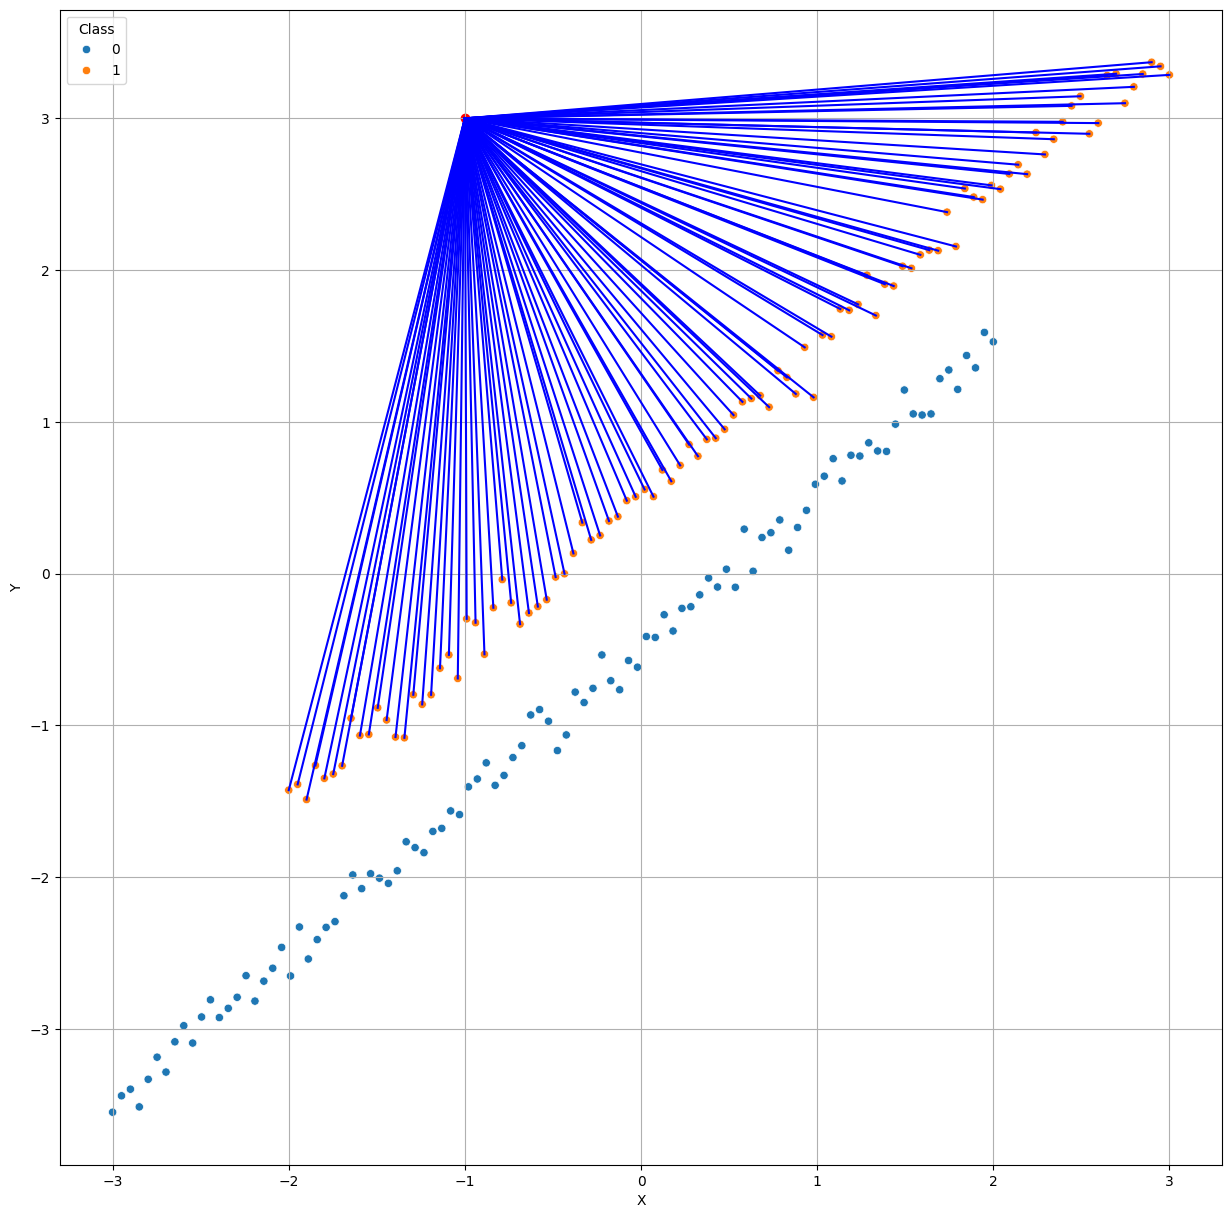

In [58]:
point = [-1.0, 3.0]

K = 100
KNN(point, class_1, class_2, K, sub_distance)

KNN running
[-3.         -2.94949495 -2.8989899  -2.84848485 -2.7979798  -2.74747475
 -2.6969697  -2.64646465 -2.5959596  -2.54545455 -2.49494949 -2.44444444
 -2.39393939 -2.34343434 -2.29292929 -2.24242424 -2.19191919 -2.14141414
 -2.09090909 -2.04040404 -1.98989899 -1.93939394 -1.88888889 -1.83838384
 -1.78787879 -1.73737374 -1.68686869 -1.63636364 -1.58585859 -1.53535354
 -1.48484848 -1.43434343 -1.38383838 -1.33333333 -1.28282828 -1.23232323
 -1.18181818 -1.13131313 -1.08080808 -1.03030303 -0.97979798 -0.92929293
 -0.87878788 -0.82828283 -0.77777778 -0.72727273 -0.67676768 -0.62626263
 -0.57575758 -0.52525253 -0.47474747 -0.42424242 -0.37373737 -0.32323232
 -0.27272727 -0.22222222 -0.17171717 -0.12121212 -0.07070707 -0.02020202
  0.03030303  0.08080808  0.13131313  0.18181818  0.23232323  0.28282828
  0.33333333  0.38383838  0.43434343  0.48484848  0.53535354  0.58585859
  0.63636364  0.68686869  0.73737374  0.78787879  0.83838384  0.88888889
  0.93939394  0.98989899  1.04040404  1

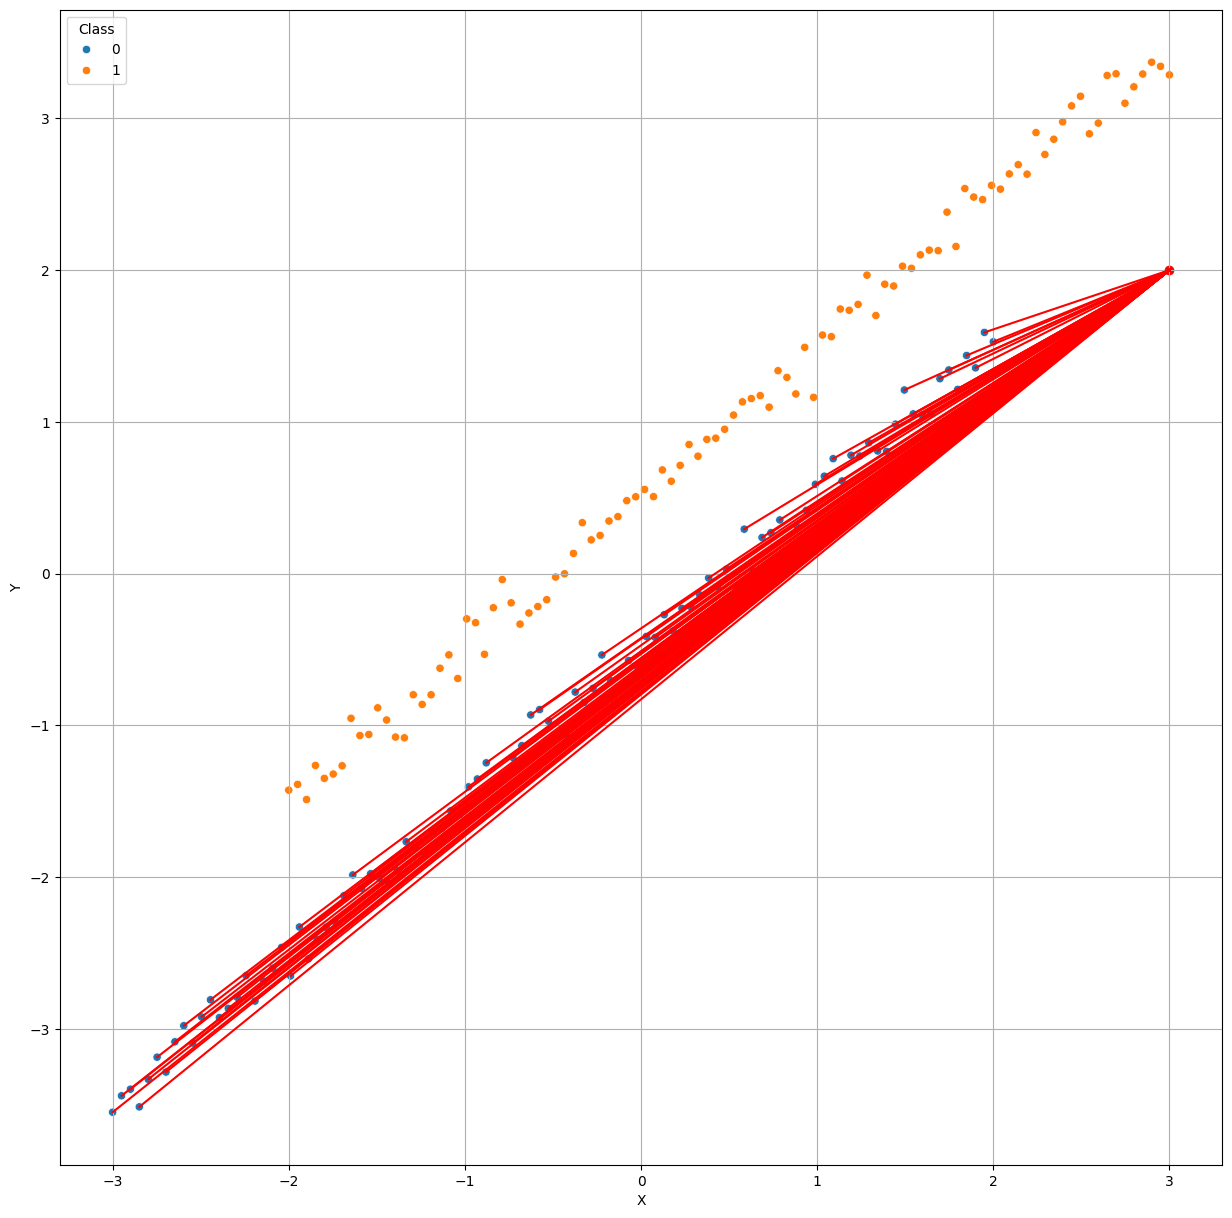

In [59]:
point = [3., 2.]

K = 100
KNN(point, class_1, class_2, K, sub_distance)

**ЗАМЕЧАНИЕ**: приведенные функции взяты лишь для примера и, вообще говоря, не являются метриками. Это просто показать:

Выберем $x_1, y_1$ и $x_2,y_2$ лежащими на одной и той же прямой, но не совпадающими. Значение обеих приведенных функций на таких парах будет равно 0, то есть не выполняется первое свойство расстояния

## Реализация в sklearn

Нам не нужно каждый раз реализовывать KNN самостоятельно, ведь он уже реализован в замечательной библиотеке `sklearn`!

В качестве параметров при инициализации алгоритма передаются:
  - `n_neighbors: int`, параметр отвечающий за выбранное число соседей (K)
  - `metric: string or callable object`. В качестве metric можно передать либо одну из фиксированного набора строк (этот набор можно посмотреть в официальной документации, либо обратившись к `sklearn.metrics.pairwise`.`PAIRWISE_DISTANCE_FUNCTIONS`, как в следующей ячейке), либо написать свою функцию расстояния и передать её в качестве аргумента,
  - `p: int`, параметр отвечающий за тип метрики (как было разобрано выше: `p==1` - это манхэттэнское расстояние, `p==2` - евклидово расстояние).

Остальные аргументы менее существенны для нас, однако с ними можно ознакомиться по [ссылке](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [60]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import warnings

# Определение обучающих примеров и целевых значений
samples = np.array([[0.0, 0.0, 0.0], [0.0, 0.5, 0.0], [1.0, 1.0, 0.5]])
y = np.array([[1.0], [1.0], [0.0]])

# Создание экземпляра KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1, p=2)

# Обучение модели
neigh.fit(samples, y)

# Предсказание для нового примера
new_sample = np.array([[1.0, 1.0, 1.0]])
predicted_class = neigh.predict(new_sample)[0]

print(f"Результат: точка была присвоена классу {int(predicted_class)}")

Результат: точка была присвоена классу 0


In [61]:
import sklearn
# Возможные метрики
sklearn.metrics.pairwise.PAIRWISE_DISTANCE_FUNCTIONS

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

### Пример использования косинусного расстояния

In [62]:
# Создание экземпляра KNeighborsClassifier с использованием косинусного расстояния
neigh = KNeighborsClassifier(n_neighbors=1, metric='cosine')

# Обучение модели
neigh.fit(samples, y)

# Предсказание для нового примера
new_sample = np.array([[1.0, 1.0, 1.0]])
predicted_class = neigh.predict(new_sample)[0]

print(f"Результат: точка была присвоена классу {int(predicted_class)}")

Результат: точка была присвоена классу 0


# Как выбрать K?





Загрузим известный датасет `wine` и попробуем проанализировать, каким образом выбрать оптимальное количество ближайших соседей. Мы пойдем таким путём: воспользуемся методом перекрёстной валидации для определения того, насколько хорошо алгоритм при некотором `K` решаеет поставленную задачу, а затем воспользуемся самым простым способом подбора гиперпараметров - переборным.

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)
print(f'X.shape: {X.shape}')

X.shape: (178, 13)


In [64]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

score = cross_val_score(clf, X, y, cv=5)

print(f'Cross Validation Score, cv=5: {score}')

Cross Validation Score, cv=5: [0.72222222 0.66666667 0.63888889 0.65714286 0.77142857]


In [65]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from tqdm.auto import tqdm

k_candidates = list(range(1, 51))
scores = []

for k in tqdm(k_candidates):
    clf = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(clf, X, y, cv=5)
    scores.append(np.mean(score))

ModuleNotFoundError: No module named 'tqdm'

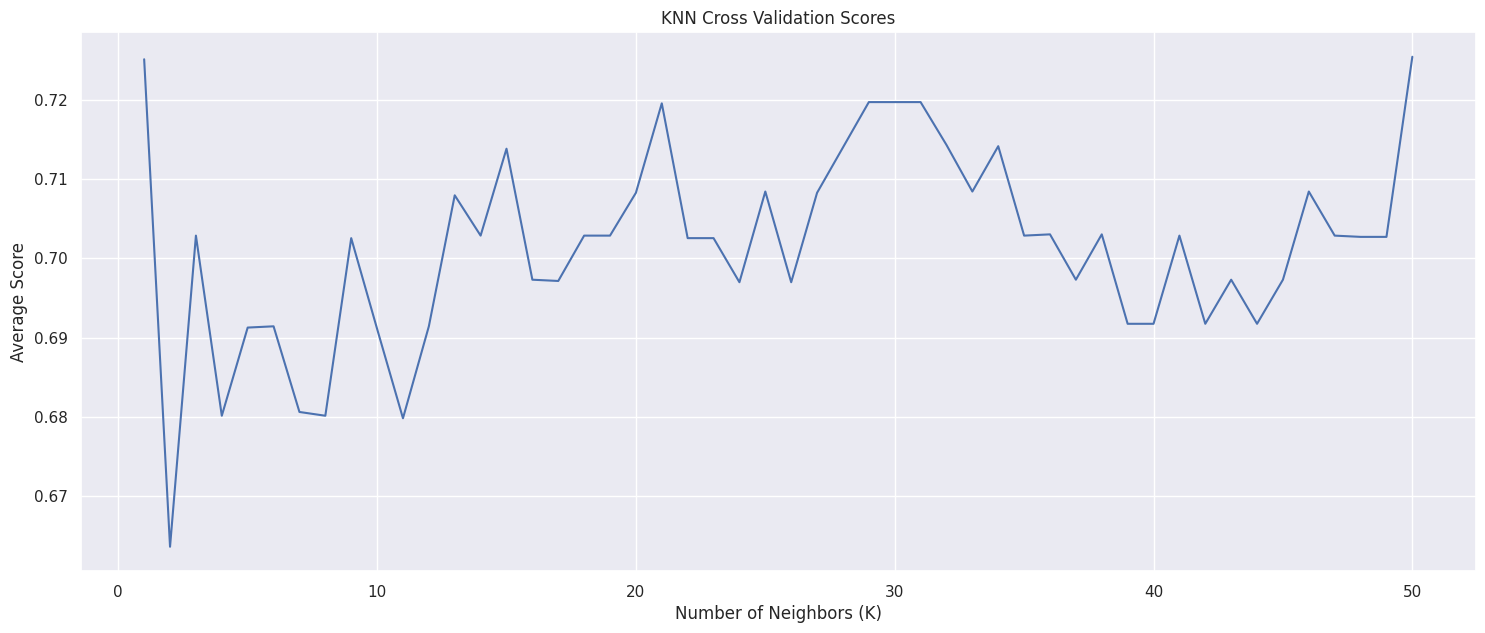

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.figure(figsize=(18, 7))
plt.plot(np.arange(1, 51), scores)
plt.title('KNN Cross Validation Scores')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Average Score')
plt.grid(True)
plt.show()

In [ ]:
k_best = np.argmax(scores) + 1
k_best

50

Представленный код нужно интерпретировать следующим образом:

При помощи функции `sklearn.model_selection.crossval` мы разбили выборку на $cv$=5 элементов, и провели описанную выше процедуру для каждого из них, получив 5 оценок качества (по умолчанию выставлена метрика `accuracy_score`). Эти оценки сохранены в массиве `score`.

В аргументы функции `cross_val_score` мы передали:
* объект класса `KNeighborsClassifier (clf)`. В качестве этого аргумента может быть выбран любой классификатор, поддерживающий методы `.fit()`, `.predict()` и (в случае необходимости для соответствующей метрики) `.predict_proba()`. Это функции обучения, предсказания и получения вероятности принадлежности объектов тому или иному классу соответственно. Это очень удобно, потому что позволяет нам использовать в качестве аргумента `clf` не только объекты классов из `sklearn`, но также и из других библиотек (или даже собственные классы).

* Обучающую выборку $X$
* Ответы к объектам обучающей выборки $y$
* $cv$ - количество "кусочков", на которые мы разбиваем выборку

Подробнее об этой функции можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).


Этот набор чисел очень о многом нам говорит:

По среднему значению мы можем определить, насколько хорош в среднем наш алгоритм. Именно среднее значение набора метрик, полученных при кросс-валидации, считается валидной оценкой качества построенного алгоритма.

Но здесь есть свои сложности. Представим, что на выходе мы получим следующий набор чисел:

$$[0.5, 0.52, 0.9, 0.55]$$

Средним значением здесь будет 0.61, что, очевидно, связано с аномально хорошим результатом на третьей позиции. Этот результат может быть обусловлен случайностью или смещеннотью какой-то из подвыборок. Его нельзя рассматривать как абсолютно корректный. Точно также нас может ввести в заблуждение среднее значение по массиву чисел с очень большим разбросом. Например, если на выходе кросс-валидации мы получим следующий результат:

$$[0.1, 0.99, 0.09, 0.95, 0.94, 0.05]$$

Верить среднему значению здесь, очевидно, нельзя. Следует искать ошибку.
Отследить такие случаи можно при помощи оценки стандартного отклонения в полученном массиве: чем оно меньше, тем оценка качества при помощи усреднения надежнее.

# Дополнительная литература

-  [Е. М. Миркес, KNN и потенциальная энергия](http://www.math.le.ac.uk/people/ag153/homepage/KNN/KNN3.html). В источнике можно найти примеры применения KNN для снижения размерности, обнаружения выбросов в данных и т.п.

- Pattern Recognition and Machine Learning, chapter 6. C.Bishop.
В книге можно найти подробности, связанные с ядерными методами машинного обучения, в том числе в рамках KNN